In [1]:
import numpy as np

## 1.1 numpy.dot() 함수
- numpy array를 수행하는 함수
- numpy.dot(a,b)의 형태

In [19]:
# a,b가 모두 1차원배열이면 inner vector 수행
np.dot([2,3,4],[3,3,4])

31

In [21]:
# a,b가 모두 2차원배열이면 matrix multiple수행

a = [[1,2],[3,4]]
b = [[1,1],[0,1]]

np.dot(a,b)

array([[1, 3],
       [3, 7]])

In [23]:
# a,b가 둘 중 하나 scalar이면 multiple(a*b)수행

print('둘 다 scalar 일 때 -', np.dot(3,5))
print('하나만 scalar 일 때 -', np.dot([3,4],2))

둘 다 scalar 일 때 - 15
하나만 scalar 일 때 - [6 8]


In [41]:
# a는 n차원 배열, b는 일차원 배열일때 각각 matrix multiple 수행
a = np.arange(2*2*3).reshape(2,2,3)
b = [[1,2], [3,4], [5,6]]

print('a\n',a)
print('b\n',b)

np.dot(a,b)

a
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
b
 [[1, 2], [3, 4], [5, 6]]


array([[[ 13,  16],
        [ 40,  52]],

       [[ 67,  88],
        [ 94, 124]]])

In [42]:
# a,b가 모두 n차원 배열이면 matrix multiple 수행
a = np.arange(2*2*3).reshape(2,2,3)
b = np.arange(2*3*2).reshape(2,3,2)

print('a\n',a)
print('b\n',b)

np.dot(a,b)

a
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
b
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


array([[[[ 10,  13],
         [ 28,  31]],

        [[ 28,  40],
         [100, 112]]],


       [[[ 46,  67],
         [172, 193]],

        [[ 64,  94],
         [244, 274]]]])

In [57]:
# dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

a = np.arange(2*2*3).reshape(2,2,3)
b = np.arange(2*3*2).reshape(2,3,2)

print(np.dot(a,b)[0,1,1,1]) 
print(np.dot(a,b)[1,1,1,1])

112
274


# 1.2 numpy Quiz 풀이
https://github.com/rougier/numpy-100

In [81]:
# Q1. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)?
A = np.zeros(5)
B = np.random.randint(0,5,20)

A += np.bincount(B, minlength = len(A))

print(A)

[4. 3. 6. 3. 4.]


In [92]:
# Q2. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)?

I = list(np.random.randint(0,10,20))
X = np.random.randint(0,10,20)

print('I\n',I)
print('X\n',X)

F = np.bincount(X,I)
print('F\n',F)

I
 [8, 7, 8, 9, 0, 1, 3, 0, 6, 7, 5, 7, 6, 2, 8, 1, 0, 6, 0, 7]
X
 [6 4 0 7 1 9 7 6 3 7 2 6 2 0 2 2 1 0 2 6]
F
 [16.  0. 20.  6.  7.  0. 22. 19.  0.  1.]


In [93]:
# Q3. Considering a four dimensions array, how to get sum over the last two axis at once?
M = np.arange(4*4).reshape(4,4)

print('M\n',M)
print(M.sum(axis= (-2,-1)))

M
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
120


In [107]:
# Q4. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? 
V = np.array([1,2,3,4,5])
Z = np.zeros(len(V) + (len(V)-1)*3)

Z[::4] = V

print(Z)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


In [132]:
# Q5. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3])
np.random.seed(628)

V = np.random.randint(0,6,(10,3))
print(V)
E = np.all(V[:,1:] == V[:,:-1], axis=1)
V[~E]

print('final\n',V[V.max(axis=1) != V.min(axis=1),:])

[[3 0 0]
 [4 2 2]
 [3 0 0]
 [4 1 0]
 [2 0 0]
 [4 0 5]
 [0 0 3]
 [1 4 5]
 [3 5 4]
 [0 4 0]]
final
 [[3 0 0]
 [4 2 2]
 [3 0 0]
 [4 1 0]
 [2 0 0]
 [4 0 5]
 [0 0 3]
 [1 4 5]
 [3 5 4]
 [0 4 0]]


# 1.3 선형방정식 풀기

In [165]:
# linearsol.py
def linearsol(a,b):
    # solve ax = b
    try : 
        if a.shape[1]==a.shape[0]:# a는 정방행렬
            inv_a = np.linalg.inv(a)
            x = np.dot(inv_a,b)
        else :
            inv_a = np.linalg.pinv(a)
            x = np.dot(inv_a,b)
        return x
    except :
        if a.shape[1]==a.shape[0]:# a는 not 정방행렬
            inv_a = np.linalg.inv(a)
            x = np.dot(inv_a,np.transpose(b))
        else :
            inv_a = np.linalg.pinv(a)
            x = np.dot(inv_a,np.transpose(b))
        return x
    
if __name__ == "__main__" :
    c = np.arange(2*3).reshape(2,3)
    d = np.array([3,4])
    linearsol(c,d)

# 2.1 linear regression 을 위한 parameter의 gradient 식 정리

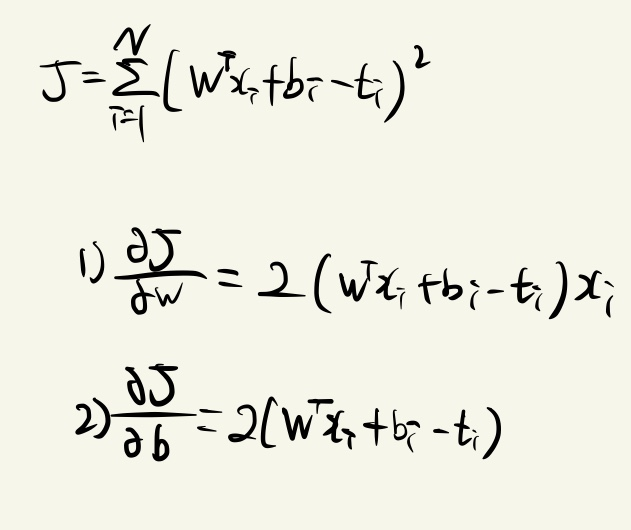

# 2.2 SGD Method
## 2.2.1 SGD를 이용한 Parameter Update식 정리

### Minibatch (stochastic) gradient descent Pseudo Code

initialize

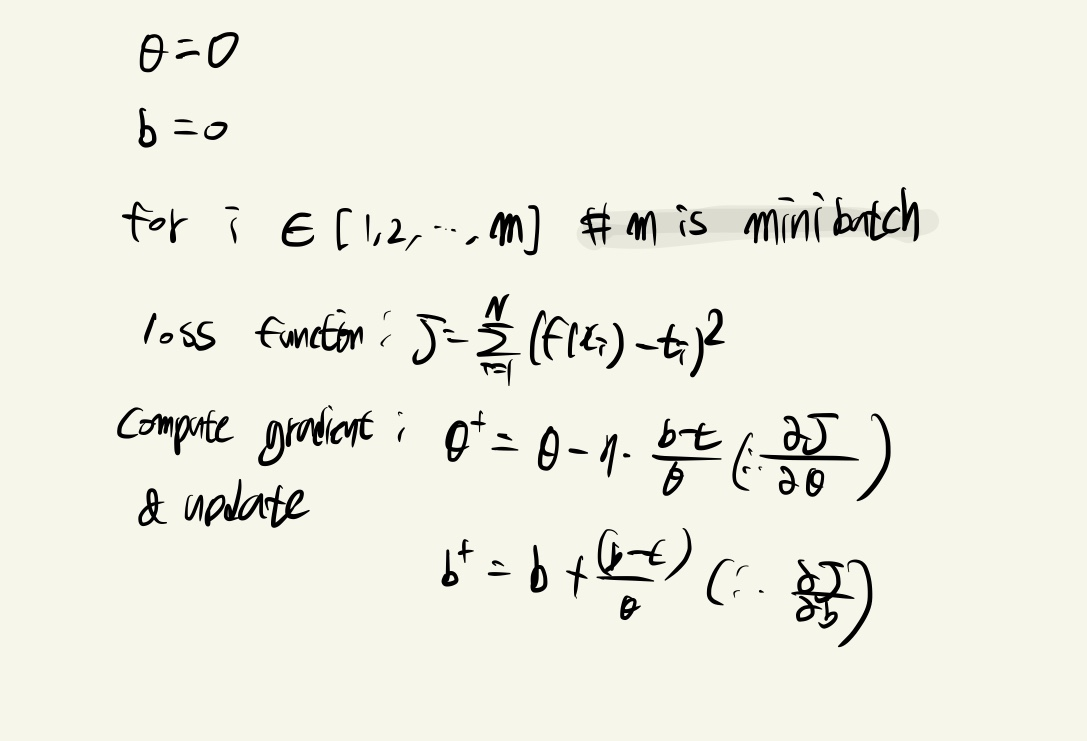

## 2.2.2 L2 Regularization 
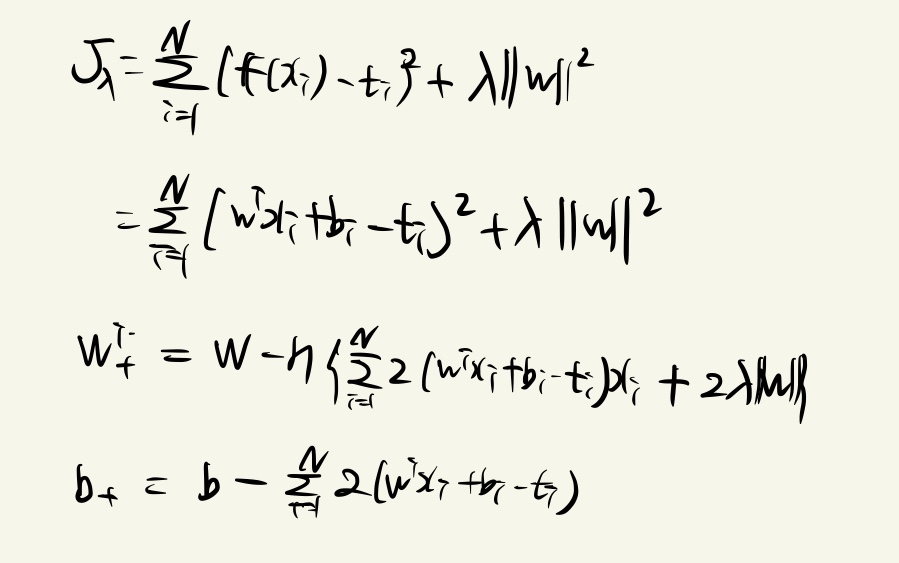

## 2.2.3 Early Stopping
- Early stopping 방법이란 업데이트된 파라미터 값과 기존 파라미터값의 차이가 임계치 밑으로 줄어들면 update를 중지하는 것을 말함
- pseudo code

initialize

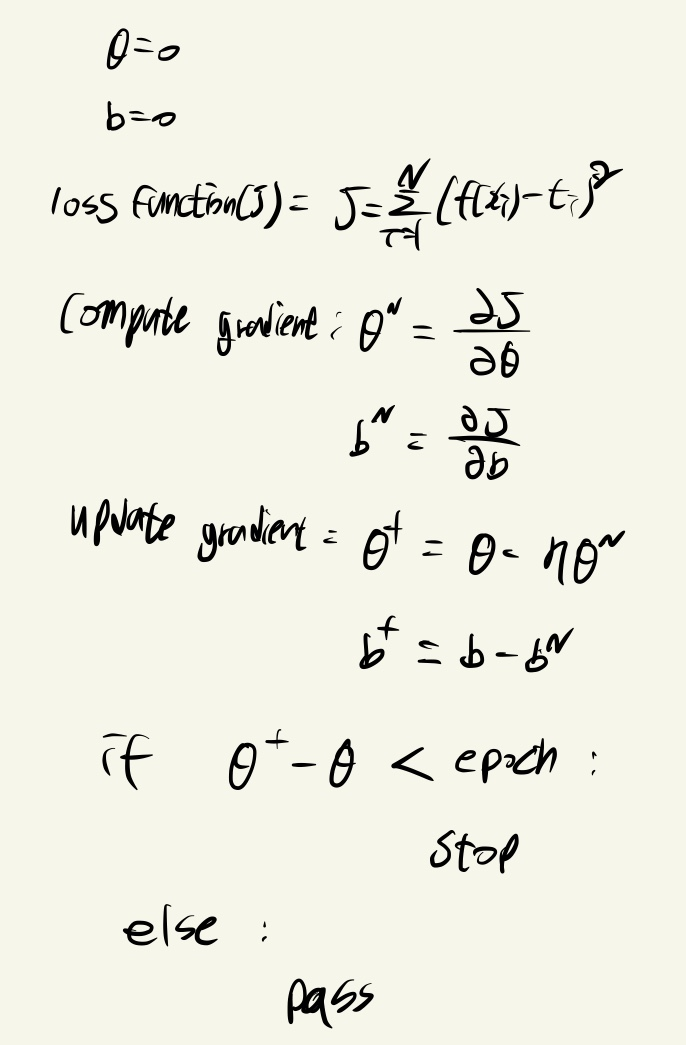

# 2.3 SGD 구현

In [ ]:
def linear_regression():
    

In [177]:
x = np.random.uniform(-10,10,(100,10))
w = np.random.uniform(-10,10,(10,1))

In [178]:
b = 2

In [182]:
y = x.dot(w) + b